## Classification
In this notebook, I am going to learn how to make a machine learning model that can classify
hand-written numbers. For learning purposes, I am only going to loosely follow his instructions
and just try to apply the general principles, develop a better sense of what is really
going on than from the previous example

# The Data
I am going to use the MNIST dataset, 70,000 small images of digits hand-written
by high school students and US Census Bureau employees.
This dataset is such a popular one that SciKit-Learn has specific methods to fetch it.

In [20]:
# using A.G.'s code to "make the images prettier"
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [21]:
# get the data, need pandas for the import as per scikit-learn
from sklearn.datasets import fetch_openml
import pandas
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto') # parser=auto is needed to silence future warnings
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### SciKit Learn dataset features
SciKit Learn datasets have common features, some seen in the keys above, that include:
* DESCR key describes the dataset
* data key has an array with one row per instance and one column per feature
* target key has an array with the labels

In [22]:
# show the specifics of the above in this dataset
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [23]:
y.shape

(70000,)

the data key has 70,000 images with 784 features each. 784 is total pixel count for each image (28 x 28).
Each feature is thus one pixel, and the pixel can have a value from 0 to 255 (white to black).
Below we will display one image from the key:

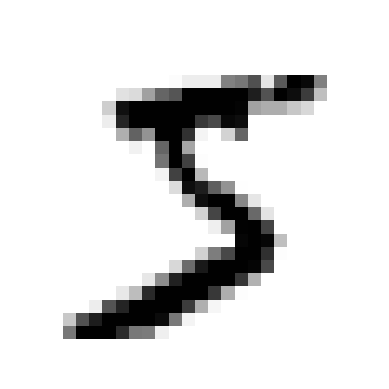

In [24]:
# we will use Matplotlib's imshow() function
import matplotlib as mpl
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28) # reshape function transforms 784 values into 28 x 28 matrix
plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

There, it looks like a 5 (it is a 5). Now let's check the label:

In [25]:
y[0] # note this is a string, might have to cast these to integers later

'5'

In [26]:
# now build the test and train sets, one of each for data and label keys
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# we don't have to shuffle the sets because they came this way from Scikit-Learn

# Make and train a binary classifier
For the purposes of learning in the sense of crawl, walk, run, we will create a binary classifier
that will learn how to distinguish 5 from everything else. Later, we will make a multi-classifier
that can learn all the other digits.
Géron recommends using a _Stochastic Gradient Descent_ classifier, which efficiently handles
large datasets.
https://en.wikipedia.org/wiki/Stochastic_gradient_descent

In [27]:
# need to create specific label set that has only the value of 5 - don't forget it's a string!
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [28]:
from sklearn.linear_model import SGDClassifier

# create the classifier object and fit to training data
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
# now let's use it to see if it can correctly guess that some digit variable we made above is 5
sgd_clf.predict([some_digit])

array([ True])

It worked!

## Develop and execute performance measures
It's difficult to evaluate a classifier compared to a regressor, so there are a multiple of methods to learn.
First we use:
### Cross-Validation
We use the cross_val_score() method from SciKit-Learn, uses K-fold cross-validation, splitting the training set
into K number of folds. We will use 3. Each fold is evaluated using a model trained on the remaining folds.

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

.> 95% accuracy! But is this good? Now we use a 'dumb' classifier to class all the not-5's:

In [31]:
from sklearn.base import BaseEstimator
import numpy as np

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

That's pretty good too, but it's just playing the odds; only 10% of the data set are 5's.
So the measurement given by cross-validation in this task doesn't really get us anywhere, and we
need to look at other methods.

### Confusion matrix
The idea is to count the number of times instances of class A are classified as class B.
You need a set of predictions to compare against actual targets. We can get these predictions
from cross_val_predict, then use the confusion matrix.

In [32]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

## Multiclass classification

## Error Analysis

## Multilabel and Multioutput Classification